## DFO Nutrient Comparison

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime as dt
import glob
import gsw

%matplotlib inline

In [2]:
PATH= '/results/SalishSea/hindcast.201905/'
start_date = dt.datetime(2013,1,1)
end_date = dt.datetime(2013,8,5)
flen=1
namfmt='nowcast'
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
fdict={'ptrc_T':1,'grid_T':1}

df1=et.loadDFO(datelims=(start_date,end_date))#,excludeSaanich=False)
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2013.0,4.0,11.0,20.848333,49.402167,-124.1555,2.6,None,None,None,11.82,mg/m^3,3.0,7.2,umol/L,27.743770,9.789540,2.57784,2013-04-11 20:50:54
1,2013.0,4.0,11.0,20.848333,49.402167,-124.1555,4.8,None,None,None,11.67,mg/m^3,2.9,7.3,umol/L,27.744457,9.787385,4.75906,2013-04-11 20:50:54
2,2013.0,4.0,11.0,20.848333,49.402167,-124.1555,10.2,None,None,None,NaN,mg/m^3,NaN,NaN,umol/L,27.749606,9.667316,10.1129,2013-04-11 20:50:54
3,2013.0,4.0,11.0,20.848333,49.402167,-124.1555,19.7,None,None,None,11.88,mg/m^3,10.6,18.5,umol/L,28.459715,9.127710,19.5313,2013-04-11 20:50:54
4,2013.0,4.0,11.0,20.848333,49.402167,-124.1555,29.9,None,None,None,NaN,mg/m^3,24.1,47.6,umol/L,29.363611,8.447678,29.6432,2013-04-11 20:50:54


(array([563.,   0.,   0.,   0.,   0.,   0., 217.,   0.,   0., 338.]),
 array([4. , 4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <a list of 10 Patch objects>)

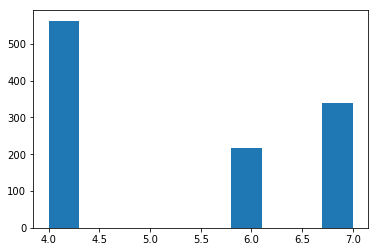

In [3]:
plt.hist(df1.Month)

In [4]:
data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)

In [5]:
data.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
0,2013.0,4.0,3.0,14.939444,49.970833,-124.6825,4.7,None,None,None,...,190,1.244002,14.522049,0.402937,8.495110,0.369340,0.892925,27.527081,9.797852,4
1,2013.0,4.0,3.0,14.939444,49.970833,-124.6825,9.9,None,None,None,...,190,14.062943,36.972191,1.157261,5.283328,0.212406,0.486608,28.322544,8.595387,9
2,2013.0,4.0,3.0,14.939444,49.970833,-124.6825,21.3,None,None,None,...,190,25.472591,55.594452,1.090259,0.216553,0.079300,0.093524,29.465714,8.382257,19
3,2013.0,4.0,3.0,14.939444,49.970833,-124.6825,22.8,None,None,None,...,190,25.472591,55.594452,1.090259,0.216553,0.079300,0.093524,29.465714,8.382257,19
4,2013.0,4.0,3.0,14.939444,49.970833,-124.6825,25.2,None,None,None,...,190,25.816195,55.507977,1.004616,0.171720,0.066929,0.083045,29.639927,8.463876,20


In [6]:
data.loc[data.Chlorophyll_Extracted>10]

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
312,2013.0,4.0,11.0,11.143889,49.029833,-123.436167,2.7,None,None,None,...,264,12.475135,30.492290,1.864037,1.282957,0.183087,0.110413,28.192888,8.941901,2
328,2013.0,4.0,11.0,20.848333,49.402167,-124.155500,2.6,None,None,None,...,204,3.735803,16.918783,1.471628,1.596304,0.218148,0.121012,24.749468,9.707176,2
329,2013.0,4.0,11.0,20.848333,49.402167,-124.155500,4.8,None,None,None,...,204,3.755080,16.941566,1.474637,1.596085,0.218059,0.120999,24.763002,9.694249,4
331,2013.0,4.0,11.0,20.848333,49.402167,-124.155500,19.7,None,None,None,...,204,14.431645,33.773029,2.335194,0.612405,0.132806,0.067879,28.346699,8.668065,18
343,2013.0,4.0,12.0,0.524722,49.443333,-124.338500,2.1,None,None,None,...,183,5.899755,19.799576,1.860816,1.563396,0.234442,0.096726,26.309975,9.874783,2
345,2013.0,4.0,12.0,0.524722,49.443333,-124.338500,9.8,None,None,None,...,183,9.987075,26.636784,2.344515,0.968669,0.189891,0.078415,27.541372,9.142091,9
346,2013.0,4.0,12.0,0.524722,49.443333,-124.338500,20.3,None,None,None,...,183,16.003515,37.707405,2.245836,0.460194,0.141581,0.070310,28.371813,8.824380,18
361,2013.0,4.0,12.0,3.034444,49.509667,-124.463833,2.5,None,None,None,...,173,9.592909,25.802389,2.084945,1.210295,0.222883,0.080857,27.608305,9.491134,2
363,2013.0,4.0,12.0,3.034444,49.509667,-124.463833,9.9,None,None,None,...,173,11.049519,28.419720,2.073171,1.117409,0.207216,0.081766,27.896952,9.236723,9
364,2013.0,4.0,12.0,3.034444,49.509667,-124.463833,19.7,None,None,None,...,173,17.145607,39.387222,2.077631,0.612261,0.122920,0.069957,28.928236,8.701108,18


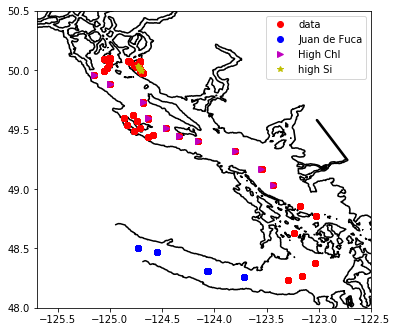

In [7]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
ax.plot(data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lon']], 
        data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lat']], 
        'bo', label = 'Juan de Fuca')
ax.plot(data.loc[data.Chlorophyll_Extracted>10,['Lon']],data.loc[data.Chlorophyll_Extracted>10,['Lat']],'m>',label='High Chl')

ax.plot(data.loc[data.Si>75,['Lon']],data.loc[data.Si>75,['Lat']],'*',color='y',label='high Si')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

# Nitrate

In [8]:
N_s, modmean_s, obsmean_s, bias_s, RMSE_s, WSS_s = et.stats(data.loc[data.Z<15,['N']],data.loc[data.Z<15,['mod_nitrate']])
N_i, modmean_i, obsmean_i, bias_i, RMSE_i, WSS_i = et.stats(data.loc[(data.Z>=15)&(data.Z<22),['N']],data.loc[(data.Z>=15)&(data.Z<22),['mod_nitrate']])
N_d, modmean_d, obsmean_d, bias_d, RMSE_d, WSS_d = et.stats(data.loc[data.Z>=22,['N']],data.loc[data.Z>=22,['mod_nitrate']])
N, modmean, obsmean, bias, RMSE, WSS = et.stats(data.loc[:,['N']],data.loc[:,['mod_nitrate']])
print('Nitrate')
print('z<15 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_s,bias_s,RMSE_s,WSS_s))
print('15 m<=z<22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_i,bias_i,RMSE_i,WSS_i))
print('z>=22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_d,bias_d,RMSE_d,WSS_d))
print('all:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N,bias,RMSE,WSS))


Nitrate
z<15 m:
  N: 272
  bias: -0.4625000243020416
  RMSE: 7.1796061753005
  WSS: 0.7906584553063118
15 m<=z<22 m:
  N: 85
  bias: 0.6290201635921662
  RMSE: 7.093913658575662
  WSS: 0.5333823041710928
z>=22 m:
  N: 491
  bias: -2.098087500748953
  RMSE: 4.0102173671247225
  WSS: 0.650650861120074
all:
  N: 848
  bias: -1.3001111504393386
  RMSE: 5.557844045151238
  WSS: 0.8972759214623061


(0, 40)

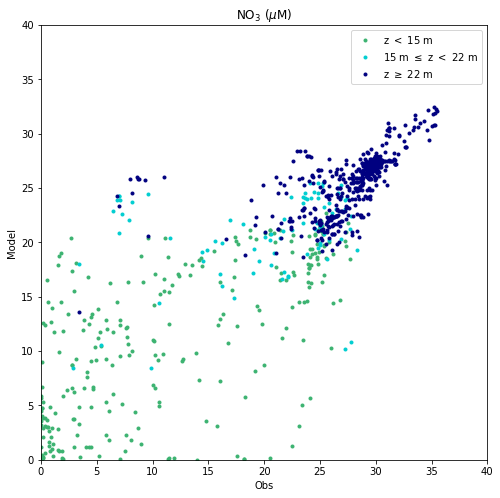

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'N','mod_nitrate','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)

Nitrate, z<15
Feb-Mar:
  N: 0
  bias: nan
  RMSE: nan
  WSS: nan
April:
  N: 127
  bias: -1.4552236695223915
  RMSE: 7.453560895806727
  WSS: 0.7631407134266228
May-Jun:
  N: 145
  bias: 0.40698896151164377
  RMSE: 6.930769575084997
  WSS: 0.7995100971270817
Sep-Oct:
  N: 0
  bias: nan
  RMSE: nan
  WSS: nan


/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:917: RuntimeWarning: invalid value encountered in double_scalars
  RMSE=np.sqrt(np.sum((mod-obs)**2)/N)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:918: RuntimeWarning: invalid value encountered in double_scalars
  WSS=1.0-np.sum((mod-obs)**2)/np.sum((np.abs(mod-obsmean)+np.abs(obs-obsmean))**2)


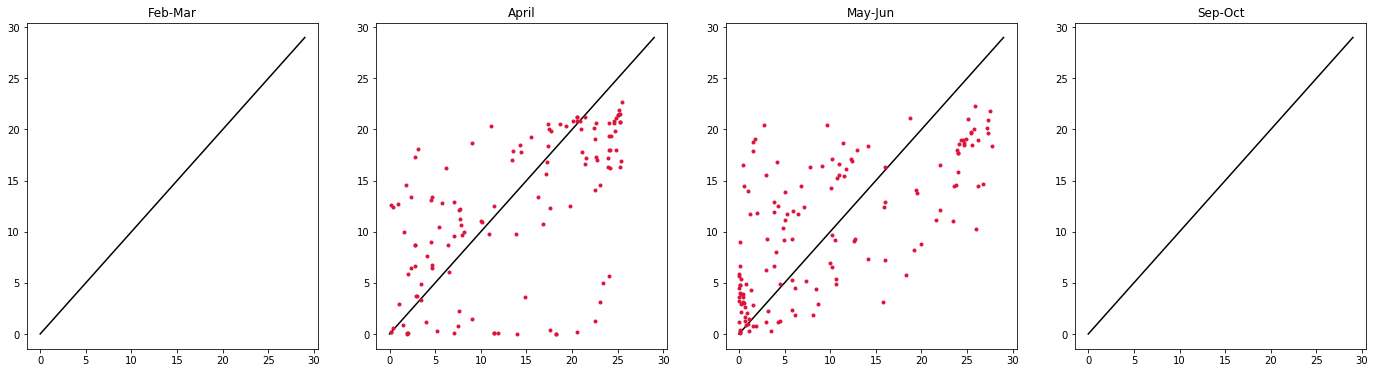

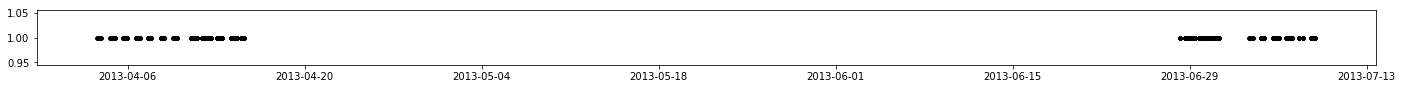

In [10]:
fig, ax = plt.subplots(1,4,figsize = (24,6))
yy=data.dtUTC[0].year
for axi in ax:
    axi.plot(np.arange(0,30),np.arange(0,30),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

#ii4=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,4,1))&(data.dtUTC>dt.datetime(2016,2,1))
#ps=et.varvarPlot(ax[0],data.loc[ii4,:],obsvar,modvar,cols=('darkturquoise','navy'))
#ii5=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,5,1))&(data.dtUTC>dt.datetime(2016,4,1))
#ps=et.varvarPlot(ax[1],data.loc[ii5,:],obsvar,modvar,cols=('darkturquoise','navy'))

print('Nitrate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate')
print('April:')
et.printstats(data.loc[ii1,:],'N','mod_nitrate')
print('May-Jun:')
et.printstats(data.loc[ii2,:],'N','mod_nitrate')
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],'N','mod_nitrate')
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

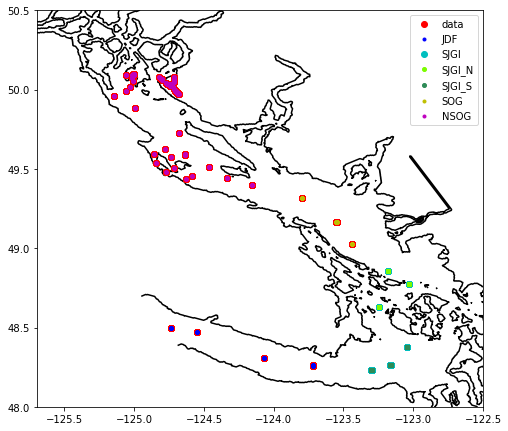

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
dJDF=data.loc[(data.Lon<-123.6)&(data.Lat<48.6)]
ax.plot(dJDF['Lon'],dJDF['Lat'],'b.',label='JDF')
dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
ax.plot(dSJGI['Lon'],dSJGI['Lat'],'c.',label='SJGI',ms=12)
dSJGI_N=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)&(data.Lat>48.5)]
ax.plot(dSJGI_N['Lon'],dSJGI_N['Lat'],'.',color='lawngreen',label='SJGI_N',ms=8)
dSJGI_S=data.loc[(data.Lon>=-123.6)&(data.Lat<48.5)]
ax.plot(dSJGI_S['Lon'],dSJGI_S['Lat'],'.',color='seagreen',label='SJGI_S',ms=8)
dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
ax.plot(dSOG['Lon'],dSOG['Lat'],'y.',label='SOG')
dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
ax.plot(dNSOG['Lon'],dNSOG['Lat'],'m.',label='NSOG')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

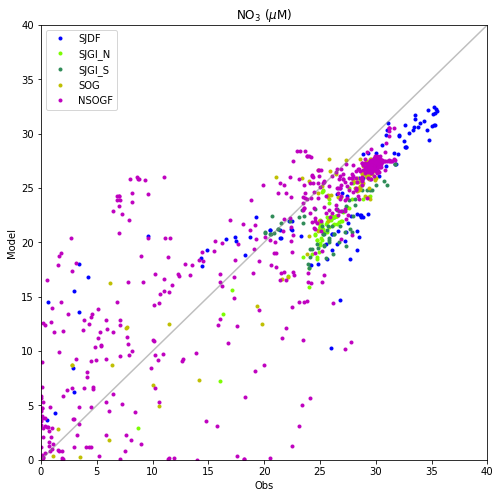

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,'N','mod_nitrate',cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,'N','mod_nitrate',cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,'N','mod_nitrate',cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,'N','mod_nitrate',cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,'N','mod_nitrate',cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)
ax.plot((0,40),(0,40),'-',color='grey',alpha=.5)

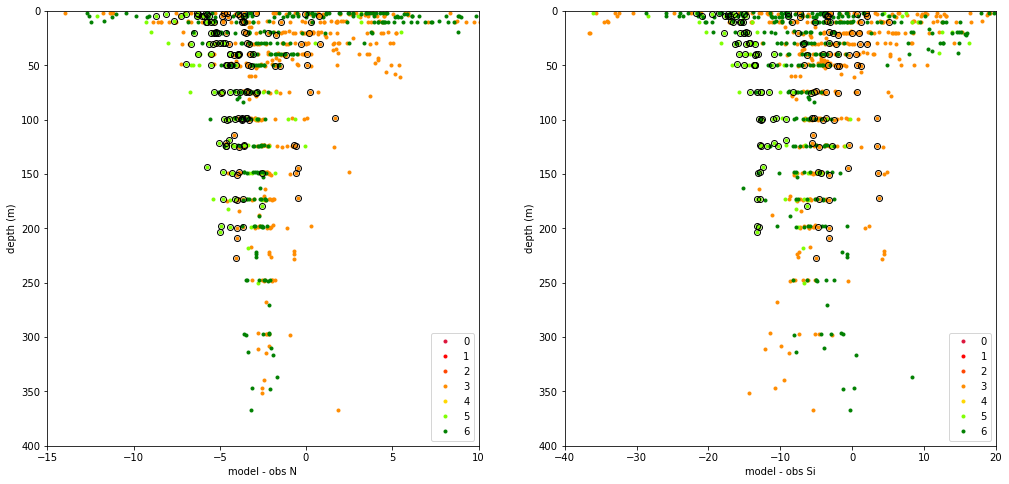

In [13]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dSJGI['mod_nitrate']-dSJGI['N'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dSJGI['mod_silicon']-dSJGI['Si'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

# Silicate

In [14]:
print('Si')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Si','mod_silicon')
print('15 m<=z<22 m:')
et.printstats(data.loc[(data.Z>=15)&(data.Z<22),:],'Si','mod_silicon')
print('z>=22 m:')
et.printstats(data.loc[data.Z>=22,:],'Si','mod_silicon')
print('all:')
et.printstats(data,'Si','mod_silicon')
print('obs Si < 50:')
et.printstats(data.loc[data.Si<50,:],'Si','mod_silicon')

Si
z<15 m:
  N: 272
  bias: -4.7073893827550535
  RMSE: 13.776241055054637
  WSS: 0.6034357843960485
15 m<=z<22 m:
  N: 85
  bias: -1.4411445662554527
  RMSE: 10.965206764000598
  WSS: 0.6750753806201448
z>=22 m:
  N: 491
  bias: -4.988115037968598
  RMSE: 7.621950198859615
  WSS: 0.8036306181094919
all:
  N: 848
  bias: -4.542537363070359
  RMSE: 10.32295283451374
  WSS: 0.835272172801242
obs Si < 50:
  N: 492
  bias: -3.5756790176639726
  RMSE: 11.714439101141314
  WSS: 0.6683257545239569


(0, 80)

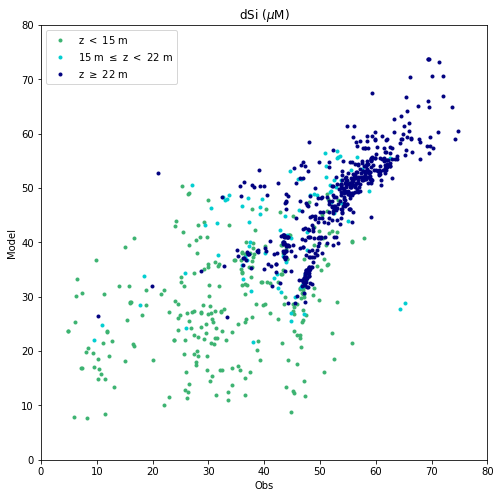

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'Si','mod_silicon','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('dSi ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

Silicate, z<15
Feb-Mar:
  N: 0
  bias: nan
  RMSE: nan
  WSS: nan
April:
  N: 127
  bias: -1.5459529516265142
  RMSE: 13.850401186085033
  WSS: 0.6869445110734891
May-Jun:
  N: 145
  bias: -7.476371636226261
  RMSE: 13.710957494703578
  WSS: 0.5124284160673753
Sep-Oct:
  N: 0
  bias: nan
  RMSE: nan
  WSS: nan


/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eolson/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:917: RuntimeWarning: invalid value encountered in double_scalars
  RMSE=np.sqrt(np.sum((mod-obs)**2)/N)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:918: RuntimeWarning: invalid value encountered in double_scalars
  WSS=1.0-np.sum((mod-obs)**2)/np.sum((np.abs(mod-obsmean)+np.abs(obs-obsmean))**2)


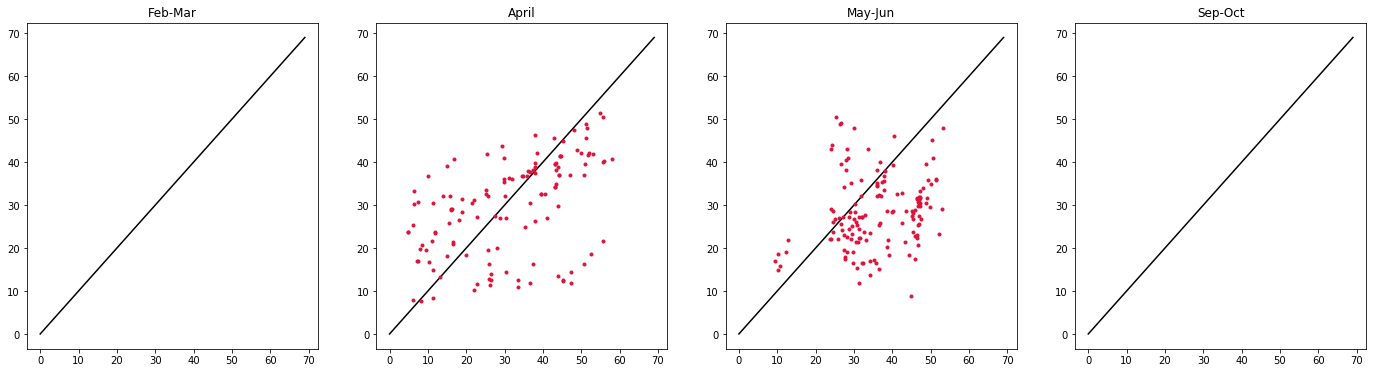

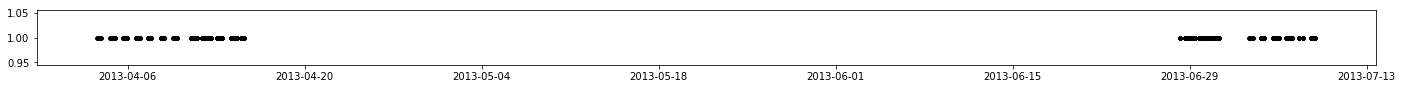

In [16]:
obsvar='Si'; modvar='mod_silicon'
fig, ax = plt.subplots(1,4,figsize = (24,6))
for axi in ax:
    axi.plot(np.arange(0,70),np.arange(0,70),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

print('Silicate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar)
print('April:')
et.printstats(data.loc[ii1,:],obsvar,modvar)
print('May-Jun:')
et.printstats(data.loc[ii2,:],obsvar,modvar)
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],obsvar,modvar)
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

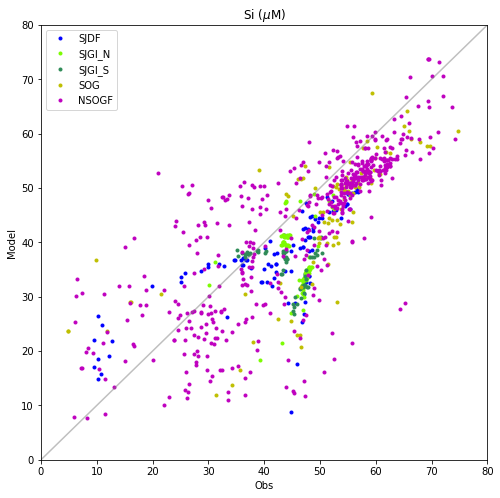

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,obsvar,modvar,cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,obsvar,modvar,cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,obsvar,modvar,cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,obsvar,modvar,cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,obsvar,modvar,cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('Si ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)
ax.plot((0,80),(0,80),'-',color='grey',alpha=.5)

# Ratios

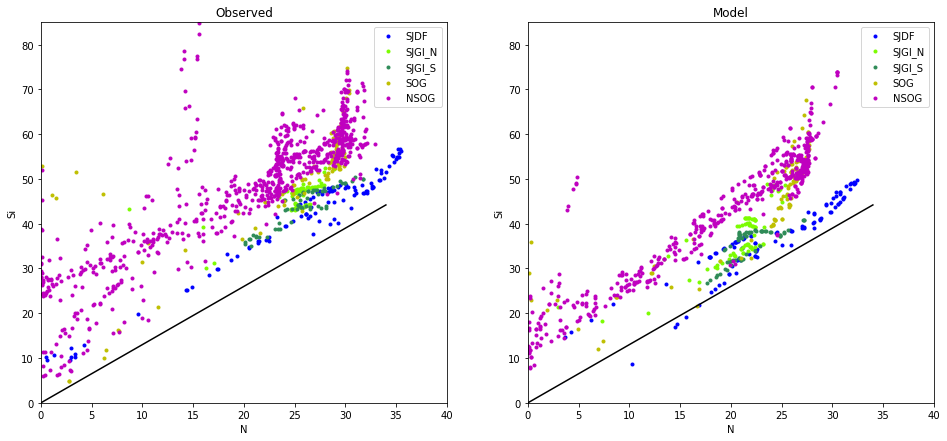

In [18]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['N'],dSJGI_N['Si'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['N'],dSJGI_S['Si'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['N'],dNSOG['Si'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Si')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_nitrate'],dSJGI_N['mod_silicon'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_nitrate'],dSJGI_S['mod_silicon'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_nitrate'],dNSOG['mod_silicon'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Si')
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,85)
ax[1].legend()
ax[0].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')
ax[1].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')

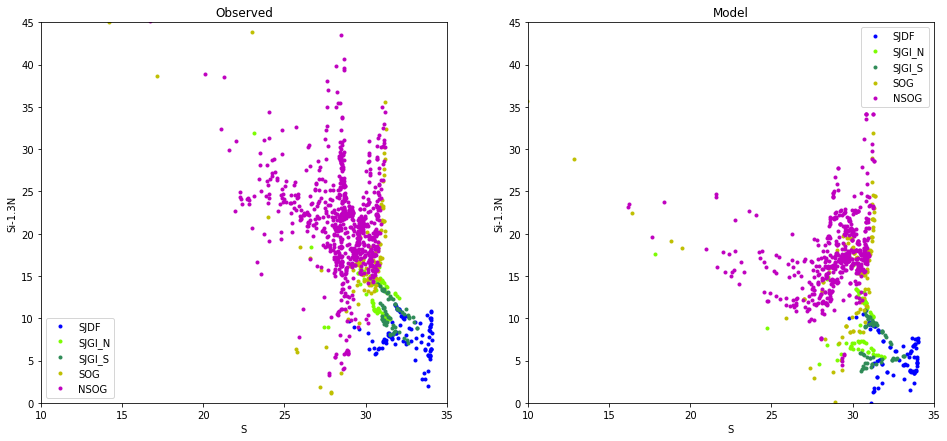

In [19]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['AbsSal'], dJDF['Si']-1.3*dJDF['N'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['AbsSal'],dSJGI_N['Si']-1.3*dSJGI_N['N'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['AbsSal'],dSJGI_S['Si']-1.3*dSJGI_S['N'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['AbsSal'],dSOG['Si']-1.3*dSOG['N'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['AbsSal'],dNSOG['Si']-1.3*dNSOG['N'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('S')
ax[0].set_ylabel('Si-1.3N')
ax[0].set_xlim(10,35)
ax[0].set_ylim(0,45)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_vosaline'],dJDF['mod_silicon']-1.3*dJDF['mod_nitrate'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_vosaline'],dSJGI_N['mod_silicon']-1.3*dSJGI_N['mod_nitrate'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_vosaline'],dSJGI_S['mod_silicon']-1.3*dSJGI_S['mod_nitrate'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_vosaline'],dSOG['mod_silicon']-1.3*dSOG['mod_nitrate'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_vosaline'],dNSOG['mod_silicon']-1.3*dNSOG['mod_nitrate'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('S')
ax[1].set_ylabel('Si-1.3N')
ax[1].set_xlim(10,35)
ax[1].set_ylim(0,45)
ax[1].legend()

In [20]:
data.loc[data.Si>65,['Month','Lat','Lon','Z','Si']]

,Month,Lat,Lon,Z,Si
146,4.0,50.066000,-124.713333,29.6414,65.3
153,4.0,50.079833,-124.714167,19.9266,65.3
154,4.0,50.079833,-124.714167,29.7405,68.0
173,4.0,50.072333,-124.812333,125.079,65.5
174,4.0,50.072333,-124.812333,149.65,66.1
175,4.0,50.072333,-124.812333,200.07,71.4
176,4.0,50.072333,-124.812333,220.77,69.4
177,4.0,50.072333,-124.812333,223.84,69.4
178,4.0,50.072333,-124.812333,227.801,69.6
204,4.0,50.073167,-125.014167,59.9722,66.4


# Chlorophyll

In [21]:
data['l10_obsChl']=np.log10(data['Chlorophyll_Extracted']+0.01)
data['l10_modChl']=np.log10(2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

In [22]:
print('log10[Chl+0.01]')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'l10_obsChl','l10_modChl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'l10_obsChl','l10_modChl')
print('all:')
et.printstats(data,'l10_obsChl','l10_modChl')
print('\n')
print('Chl')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Chlorophyll_Extracted','mod_Chl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'Chlorophyll_Extracted','mod_Chl')
print('all:')
et.printstats(data,'Chlorophyll_Extracted','mod_Chl')


log10[Chl+0.01]
z<15 m:
  N: 79
  bias: -0.17162900753341326
  RMSE: 0.5673360998053941
  WSS: 0.48052704613567554
z>=15 m:
  N: 40
  bias: -0.23737260079266698
  RMSE: 0.5705156840292843
  WSS: 0.46341463013951545
all:
  N: 119
  bias: -0.19372769434324644
  RMSE: 0.5684068520851557
  WSS: 0.547971381395163


Chl
z<15 m:
  N: 79
  bias: -2.874155749767473
  RMSE: 6.599410898972093
  WSS: 0.4276160649999148
z>=15 m:
  N: 40
  bias: -2.4990276107694953
  RMSE: 5.2661327396090165
  WSS: 0.405316636291297
all:
  N: 119
  bias: -2.7480622576673133
  RMSE: 6.183409541989155
  WSS: 0.4320550450403817


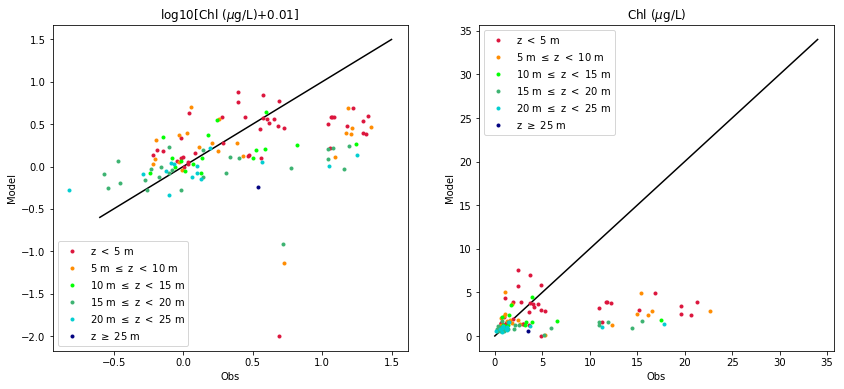

In [23]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
ax[0].plot(np.arange(-.6,1.6,.1),np.arange(-.6,1.6,.1),'k-')
ps=et.varvarPlot(ax[0],data,'l10_obsChl','l10_modChl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('log10[Chl ($\mu$g/L)+0.01]')
ax[1].plot(np.arange(0,35),np.arange(0,35),'k-')
ps=et.varvarPlot(ax[1],data,'Chlorophyll_Extracted','mod_Chl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('Chl ($\mu$g/L)')

(0, 30)

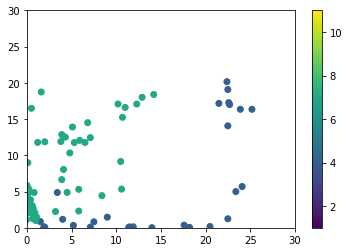

In [24]:
ii=(data.Lat>49.8)&(data.Lat<50.2)&(data.Lon>-124.8)&(data.Lon<-124.5)&(data.Z<10)
#,['Month','Z','mod_Chl','Chlorophyll_Extracted','mod_nitrate','N','mod_silicon','Si']]
plt.scatter(data.loc[ii,['N']],data.loc[ii,['mod_nitrate']],c=data.loc[ii,['Month']],vmin=1,vmax=11)
plt.colorbar()
plt.xlim(0,30)
plt.ylim(0,30)

(0, 30)

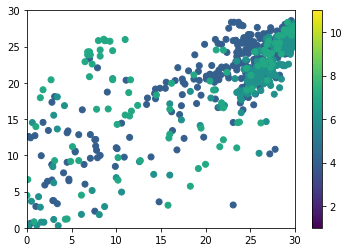

In [25]:
plt.scatter(data.loc[~ii,['N']],data.loc[~ii,['mod_nitrate']],c=data.loc[~ii,['Month']],vmin=1,vmax=11)
plt.colorbar()
plt.xlim(0,30)
plt.ylim(0,30)

(0, 60)

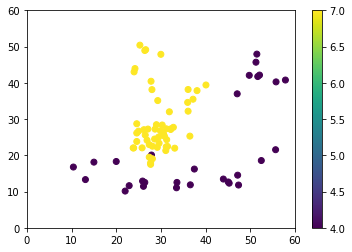

In [26]:
plt.scatter(data.loc[ii,['Si']],data.loc[ii,['mod_silicon']],c=data.loc[ii,['Month']])
plt.colorbar()
plt.xlim(0,60)
plt.ylim(0,60)

In [27]:
fspin=nc.Dataset('/results/SalishSea/spinup.201905/02mar13/SalishSea_1h_20130302_20130302_ptrc_T.nc')

In [28]:
ftest=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/CedarRuns/t15r15LinbfSi/SalishSea_1h_20150220_20150410_ptrc_T_20150302-20150311.nc')

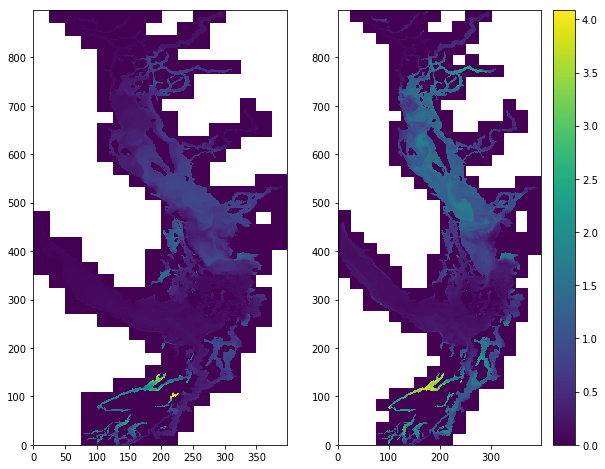

In [29]:
fig,ax=plt.subplots(1,2,figsize=(10,8))
ax[0].pcolormesh(fspin.variables['diatoms'][0,0,:,:])
m=ax[1].pcolormesh(ftest.variables['diatoms'][0,0,:,:])
plt.colorbar(m)

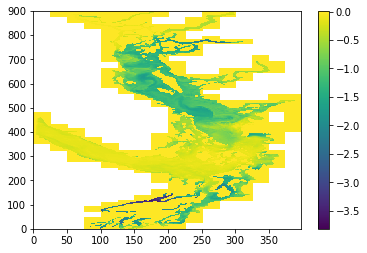

In [30]:
plt.pcolormesh(fspin.variables['diatoms'][0,0,:,:]-ftest.variables['diatoms'][0,0,:,:])
plt.colorbar()

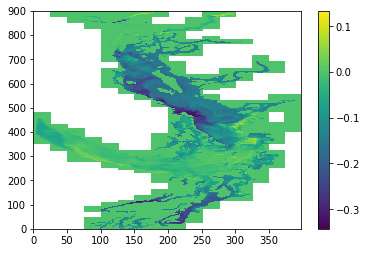

In [31]:
plt.pcolormesh(fspin.variables['microzooplankton'][0,0,:,:]-ftest.variables['microzooplankton'][0,0,:,:])
plt.colorbar()

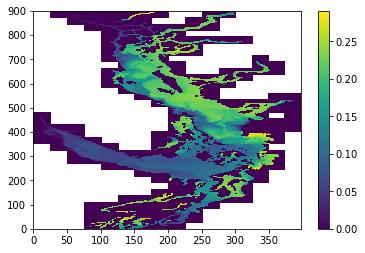

In [32]:
plt.pcolormesh(fspin.variables['microzooplankton'][0,0,:,:])
plt.colorbar()

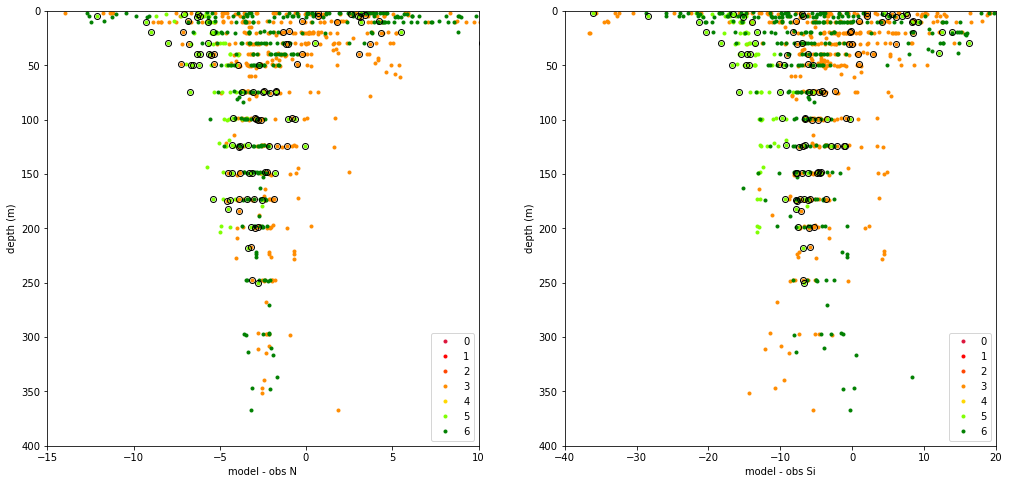

In [33]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_nitrate']-dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon']-dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

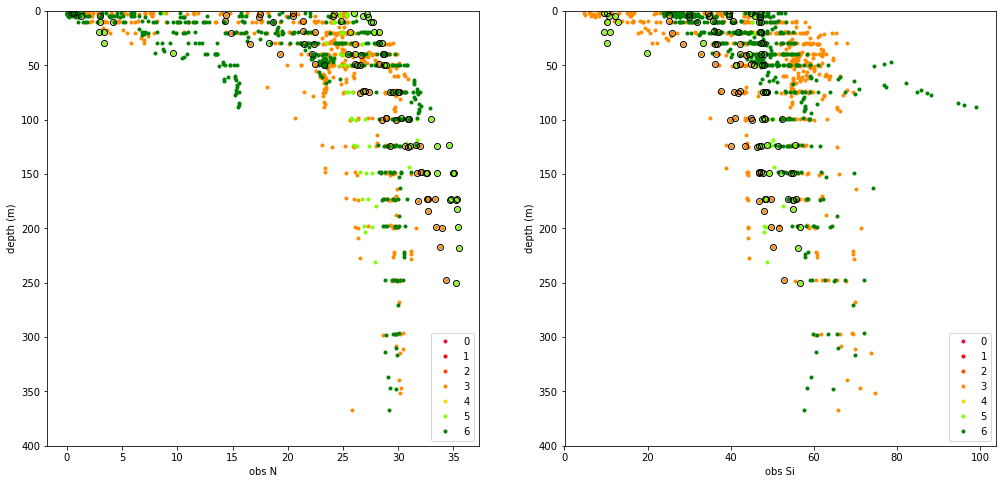

In [34]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs N')
#ax[0].set_xlim(-15,10)
ax[1].set_xlabel('obs Si')
#ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

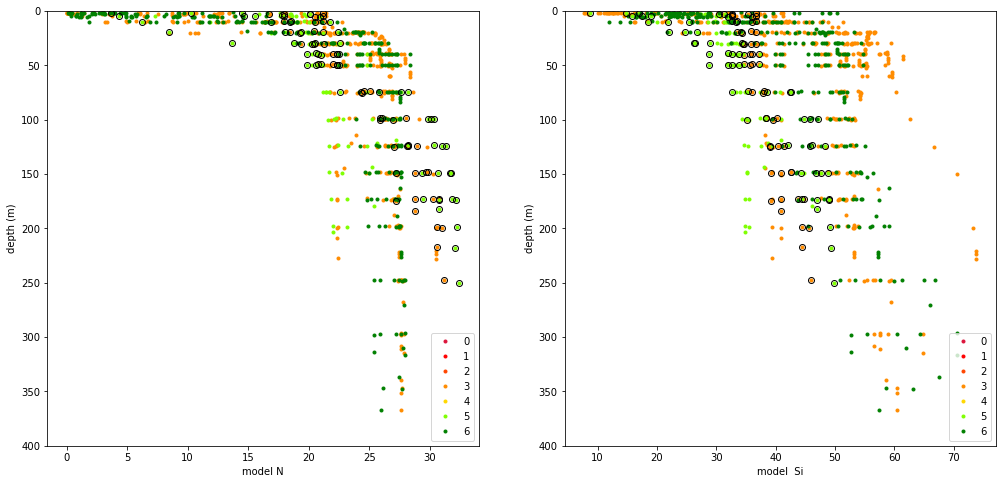

In [35]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model N')
ax[1].set_xlabel('model  Si')
ax[0].plot(dJDF['mod_nitrate'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

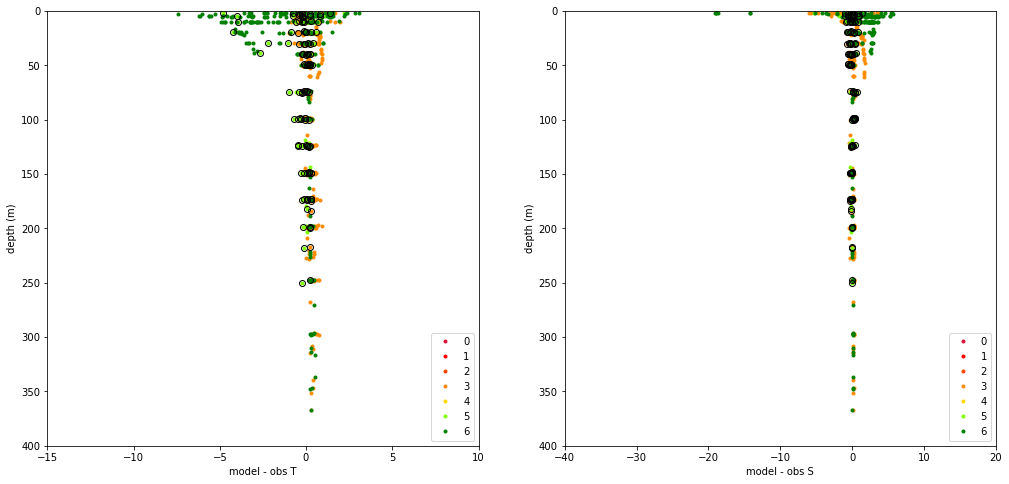

In [36]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values-data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values-data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs T')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs S')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_votemper']-dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline']-dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

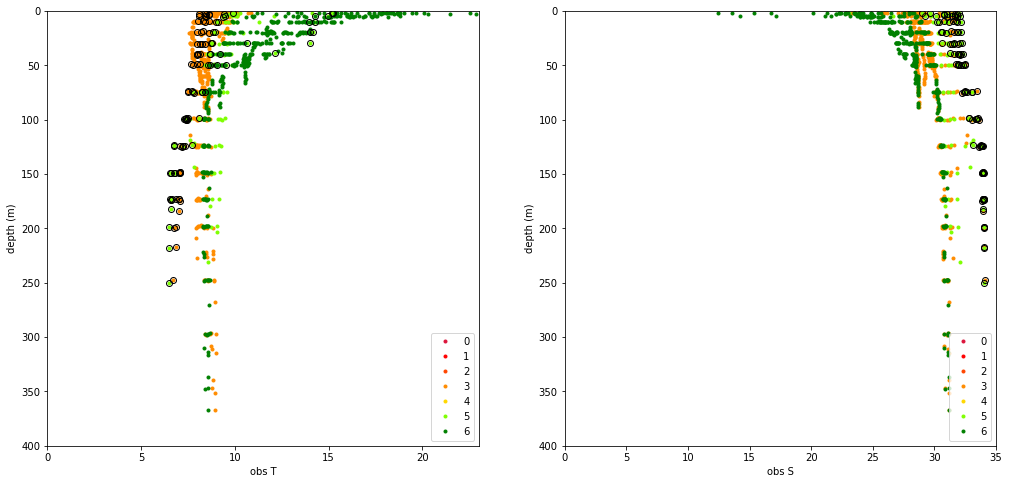

In [37]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('obs S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

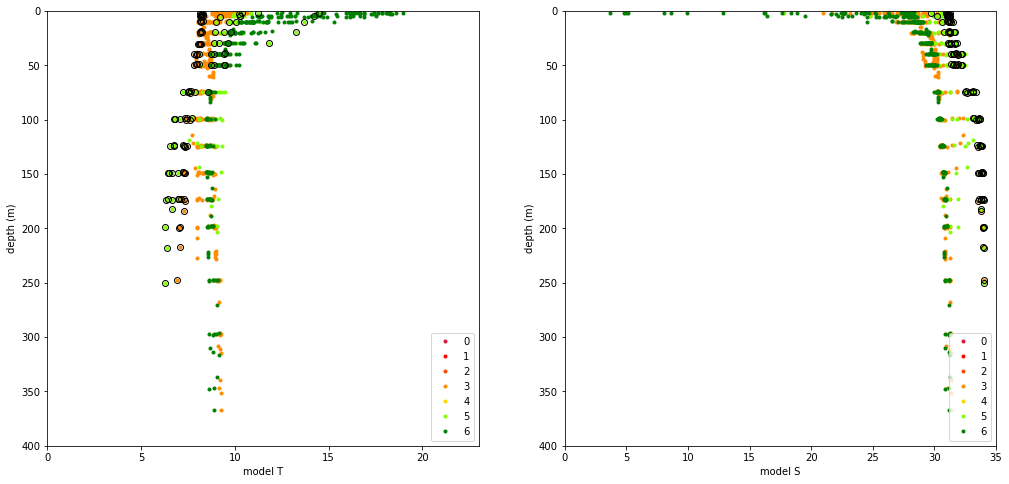

In [38]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('model S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['mod_votemper'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')